# _Fake News Detection with Machine Learning_

<img src='../data/fake-news.jpg'>

### 📌 _Proje Tanımı_
_Sahte haberler, özellikle sosyal medya ve dijital haber platformlarında hızla yayılmakta ve ciddi bilgi kirliliğine yol açmaktadır. Politik ve dini içerikli sahte haberler, toplumda yanlış yönlendirme, kaos ve şiddet olaylarına sebep olabilmektedir._

---

### _🎯 Projenin Amacı_
_Bu projenin temel amacı, haber başlığı ve içeriği üzerinden öğrenen bir makine öğrenmesi modeli geliştirerek, verilen bir haberin **sahte mi yoksa gerçek mi olduğunu otomatik olarak sınıflandırmaktır**._

---

### _📂 Veri Seti Hakkında_
_Projede kullanılan veri seti aşağıdaki sütunlardan oluşmaktadır:_

- _**title**: Haber başlığı_  
- _**text**: Haber içeriği_  
- _**label**:_  
  - _`0` → Sahte Haber_  
  - _`1` → Gerçek Haber_ 

_Bu veri seti, sahte ve gerçek haberler arasındaki dilsel farklılıkları analiz etmek için kullanılmıştır._

---

### _🛠️ Kullanılan Teknolojiler_
- _Python_  
- _Pandas_  
- _NumPy_  
- _Scikit-learn_ 
- _Doğal Dil İşleme (NLP)_

---

### _🔄 Proje Aşamaları_
1. _Veri setinin yüklenmesi_  
2. _Veri temizleme ve ön işleme_  
3. _Metinlerin sayısal veriye dönüştürülmesi (TF-IDF / CountVectorizer)_  
4. _Eğitim ve test verilerinin ayrılması_  
5. _Makine öğrenmesi modelinin eğitilmesi_  
6. _Model performansının değerlendirilmesi_  
7. _Sahte haber tahmini yapılması_  

## _Data Preprocessing_

### _Import_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

# pandas kütüphanesi veri analizi ve tablo (DataFrame) işlemleri için kullanılır.
# Bu ayar, çıktıdaki maksimum sütun sayısını 100 olarak belirler, böylece veriler tam görünür.

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

### _Read Data_

In [2]:
df = pd.read_csv('../data/fake_or_real_news.csv')

# 'twitter.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

In [5]:
df["content"] = df["title"] + " " + df["text"]

In [8]:
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

In [9]:
df = df[['content', 'label']]

### _Exploratory Data Analysis_

In [10]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,content,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy U....,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1


In [11]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,content,label
4438,HERE THEY GO AGAIN! Muslims trying to claim th...,0


In [12]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(6335, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6335 non-null   object
 1   label    6335 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.1+ KB


In [14]:
df.isnull().sum()
# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

content    0
label      0
dtype: int64

## _Text Cleaning and Preprocessing with NeatText_

### _Import_

In [15]:
import neattext as nfx  

# neattext kütüphanesini içe aktarır; metin temizleme ve ön işleme işlemleri için kullanılır

### _join_

In [53]:
s = ' '.join(df.content)  

# DataFrame’deki tüm metinleri tek bir string hâline getirir

In [94]:
#s  

# Tüm yorumların birleştirilmiş hâlini gösterir

### _remove_special_characters;_

In [58]:
s = nfx.remove_special_characters(s)  

# Metindeki özel karakterleri temizler; yalnızca harf ve sayıları bırakır

In [95]:
#s  

# Özel karakterler temizlendikten sonra metnin güncellenmiş hâlini görüntüler

### _normalize;_

In [60]:
s = nfx.normalize(s)  

# Metni normalize eder: boşlukları düzeltir, gereksiz tekrarları kaldırır ve yazım standartlarını uygular

In [93]:
#s  

# Normalize edildikten sonra metnin güncellenmiş hâlini görüntüler

## _Exploratory Data Analysis on Cleaned Text Data_

In [63]:
s = nfx.TextFrame(s)  

# Metni neattext’in TextFrame objesine dönüştürür; metin analizi ve istatistikleri için kullanılabilir

In [64]:
s.describe()  

# TextFrame içindeki metinle ilgili istatistikleri özetler; kelime sayısı, karakter sayısı gibi bilgiler verir

Key      Value          
Length  : 19843544       
vowels  : 6450867        
consonants: 10677665       
stopwords: 111616         
punctuations: 0              
special_char: 0              
tokens(whitespace): 2614808        
tokens(words): 2614808        


In [65]:
s.length  

# TextFrame içindeki toplam karakter sayısını verir

19843544

In [66]:
s.head()  

# TextFrame içindeki ilk birkaç satırı veya metin örneklerini görüntüler

'smell'

In [67]:
s.readability()  

# TextFrame içindeki metinlerin okunabilirlik skorunu hesaplar
# (örneğin Flesch Reading Ease veya benzeri metrikler)

{'automated readability': 1357519.4945468586, 'description': None}

## _Seaborn_

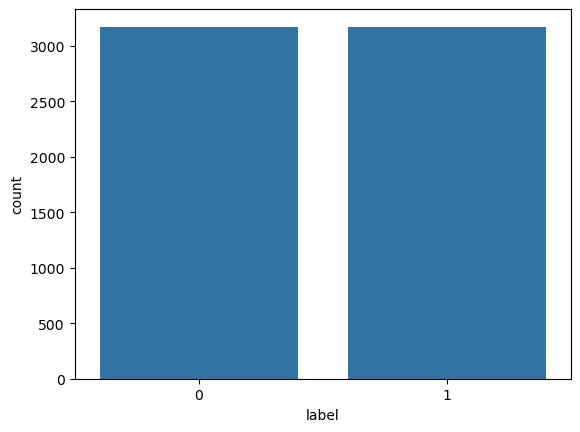

In [62]:
sns.countplot(x=df['label']);  

# _Using Pipeline for Data Processing and Modeling_

## _RandomForestClassifier_

### _Import_

In [68]:
from sklearn.feature_extraction.text import CountVectorizer  

# Metinleri sayısal vektörlere dönüştürmek için CountVectorizer sınıfını içe aktarır

from sklearn.ensemble import RandomForestClassifier  

# Random Forest sınıflandırma modelini içe aktarır; birden fazla karar ağacını birleştirerek güçlü bir tahmin modeli oluşturur

from sklearn.pipeline import Pipeline  

# Veri işleme ve model adımlarını ardışık bir şekilde birleştirmek için Pipeline sınıfını içe aktarır

from sklearn.model_selection import train_test_split  

# Veriyi eğitim ve test setlerine ayırmak için gerekli fonksiyonu içe aktarır

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  

# Model performansını değerlendirmek için gerekli metrikleri ve karışıklık matrisini içe aktarır

from sklearn.svm import SVC  

# Destek Vektör Makinesi (Support Vector Classifier) sınıflandırıcı modelini içe aktarır

import joblib

# joblib kütüphanesini projeye dahil eder

### _x, y;_

In [69]:
x = df['content']  
# Modelin girdi (features) verisi olarak metin sütununu alır

y = df['label']  
# Modelin hedef (target) verisi olarak sınıf sütununu alır (ham/spam)

### _Pipeline;_

In [70]:
clf = Pipeline([
    ('CountVect', CountVectorizer()),
    ('Classifier', RandomForestClassifier())
])  

# Pipeline ile metin verisini önce CountVectorizer ile vektörleştirir, ardından Random Forest sınıflandırıcı ile tahmin yapar

### _train_test_split;_

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  

# Veriyi %80 eğitim ve %20 test olarak ayırır; random_state ile tekrar üretilebilirlik sağlanır

### _fit;_

In [72]:
clf.fit(x_train, y_train)  

# Pipeline içindeki CountVectorizer ve Random Forest modelini eğitim verisi ile birlikte eğitir

Pipeline(steps=[('CountVect', CountVectorizer()),
                ('Classifier', RandomForestClassifier())])

### _predict;_

In [73]:
tahmin = clf.predict(x_test)  

# Eğitilmiş model ile test verisinin sınıflarını tahmin eder

### _accuracy_score;_

In [74]:
accuracy_score(y_test, tahmin)  

# Modelin test verisi üzerindeki doğruluk (accuracy) oranını hesaplar

0.9037095501183899

### _classification_report;_

In [75]:
print(classification_report(y_test, tahmin))  

# Modelin test verisi üzerindeki sınıf bazlı performansını gösterir
# Precision, Recall, F1-score ve destek (support) değerlerini içerir

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       628
           1       0.89      0.92      0.91       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



### _confusion_matrix;_

In [76]:
confusion_matrix(tahmin, y_test)  

# Tahminler ile gerçek değerler arasındaki karışıklık matrisini hesaplar
# Hangi sınıfların doğru/yanlış tahmin edildiğini gösterir

array([[554,  48],
       [ 74, 591]])

## _Support Vector Classifier;_

### _pipeline;_

In [77]:
svm = Pipeline([
    ('CountVect', CountVectorizer()),
    ('Classifier', SVC())
])  

# Pipeline oluşturur: metni önce CountVectorizer ile vektörleştirir, ardından Support Vector Classifier ile sınıflandırır

### _svm.fit;_

In [78]:
svm.fit(x_train, y_train)  

# Pipeline içindeki CountVectorizer ve Random Forest modelini eğitim verisi ile birlikte eğitir

Pipeline(steps=[('CountVect', CountVectorizer()), ('Classifier', SVC())])

### _svm.predict;_

In [79]:
tahmin2 = svm.predict(x_test)  

# Eğitilmiş model ile test verisinin sınıflarını tahmin eder

### _accuracy_score;_

In [80]:
accuracy_score(y_test, tahmin2)  

# İkinci modelin (svm pipeline) test verisi üzerindeki doğruluk (accuracy) oranını hesaplar

0.8816101026045777

### _classification_report;_

In [81]:
print(classification_report(y_test, tahmin2))  

# İkinci modelin test verisi üzerindeki sınıf bazlı performansını gösterir
# Precision, Recall, F1-score ve destek (support) değerlerini içerir

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       628
           1       0.93      0.83      0.88       639

    accuracy                           0.88      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.89      0.88      0.88      1267



### _confusion_matrix;_

In [82]:
confusion_matrix(tahmin2, y_test)  

# İkinci modelin tahminleri ile gerçek değerler arasındaki karışıklık matrisini hesaplar
# Hangi sınıfların doğru/yanlış tahmin edildiğini gösterir

array([[587, 109],
       [ 41, 530]])

### _heatmap;_

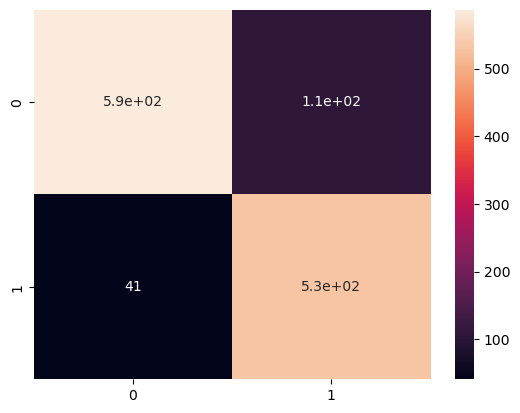

In [83]:
sns.heatmap(confusion_matrix(tahmin2, y_test), annot=True);  

# İkinci modelin karışıklık matrisini görselleştirir
# Annot=True ile hücre değerlerini gösterir

## _Using Joblib for Model Persistence_

In [84]:
test1 = df.sample(1)["content"].values[0]

In [85]:
joblib.dump(svm,'svm_hs.pkl')

# SVM modelini svm_hs.pkl dosyasına kaydeder

['svm_hs.pkl']

In [86]:
joblib.dump(clf,'clf_hs.pkl')

# clf modelini clf_hs.pkl dosyasına kaydeder

['clf_hs.pkl']

In [87]:
loaded_model = joblib.load('svm_hs.pkl')

# svm_hs.pkl dosyasındaki modeli yükler

# _Sentiment Analysis_

In [88]:
from textblob import TextBlob

# TextBlob kütüphanesindeki sınıfı projeye dahil eder

In [89]:
blob = TextBlob(test1)

# test1 metninden bir TextBlob nesnesi oluşturur

In [90]:
blob.sentiment

# metnin duygu analizini (polarity ve subjectivity) hesaplar

Sentiment(polarity=0.13881100726895113, subjectivity=0.309423676012461)

In [91]:
blob.sentiment.polarity

# metnin duygu değerini sayı olarak döndürür

0.13881100726895113

In [92]:
blob.sentiment.subjectivity

# metnin öznelik derecesini döndürür

0.309423676012461